In [211]:
# IVV & SPY 關聯規則分析（Association Rule Analysis）

# 安裝必要套件
!pip install mlxtend --quiet

# 載入套件
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns


In [212]:
from google.colab import drive#連結雲端硬碟
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [213]:
# 載入 IVV 和 SPY 的資料
ivv_df = pd.read_csv('/content/drive/MyDrive/金融大數據應用/期末報告/IVV.csv')
spy_df = pd.read_csv('/content/drive/MyDrive/金融大數據應用/期末報告/SPY.csv')

In [214]:
# 轉換日期格式
ivv_df['Date'] = pd.to_datetime(ivv_df['Date'])
spy_df['Date'] = pd.to_datetime(spy_df['Date'])

# 只保留收盤價與日期
ivv_df = ivv_df[['Date', 'Close']].rename(columns={'Close': 'IVV_Close'})
spy_df = spy_df[['Date', 'Close']].rename(columns={'Close': 'SPY_Close'})

# 合併資料
merged_df = pd.merge(ivv_df, spy_df, on='Date', how='inner').sort_values('Date')
merged_df

,Date,IVV_Close,SPY_Close
0,2000-05-19,140.687500,141.125000
1,2000-05-22,139.812500,140.062500
2,2000-05-23,137.687500,138.000000
3,2000-05-24,139.750000,140.250000
4,2000-05-25,138.468750,137.843750
...,...,...,...
5585,2022-08-02,410.320007,408.059998
5586,2022-08-03,416.720001,414.450012
5587,2022-08-04,416.320007,414.170013
5588,2022-08-05,415.589996,413.470001


In [215]:
# 顯示欄位名稱確認內容
print("IVV columns:", ivv_df.columns)
print("SPY columns:", spy_df.columns)


IVV columns: Index(['Date', 'IVV_Close'], dtype='object')
SPY columns: Index(['Date', 'SPY_Close'], dtype='object')


In [216]:
# 嘗試找出收盤價欄位名稱（處理大小寫差異）
ivv_close_col = [col for col in ivv_df.columns if 'close' in col.lower()][0]
spy_close_col = [col for col in spy_df.columns if 'close' in col.lower()][0]

In [217]:
# 轉換日期格式
ivv_df['Date'] = pd.to_datetime(ivv_df['Date'])
spy_df['Date'] = pd.to_datetime(spy_df['Date'])

# 只保留收盤價與日期
ivv_df = ivv_df[['Date', ivv_close_col]].rename(columns={ivv_close_col: 'IVV_Close'})
spy_df = spy_df[['Date', spy_close_col]].rename(columns={spy_close_col: 'SPY_Close'})

# 合併資料
merged_df = pd.merge(ivv_df, spy_df, on='Date', how='inner').sort_values('Date')


In [218]:
# 計算每日漲跌
merged_df['IVV_Up'] = merged_df['IVV_Close'].diff() > 0
merged_df['SPY_Up'] = merged_df['SPY_Close'].diff() > 0


In [219]:
# 計算移動平均線 (3日與7日)
merged_df['IVV_MA3'] = merged_df['IVV_Close'].rolling(window=3).mean()
merged_df['IVV_MA7'] = merged_df['IVV_Close'].rolling(window=7).mean()
merged_df['SPY_MA3'] = merged_df['SPY_Close'].rolling(window=3).mean()
merged_df['SPY_MA7'] = merged_df['SPY_Close'].rolling(window=7).mean()

In [220]:
# 比較均線與收盤價
merged_df['IVV_MA3_Up'] = merged_df['IVV_Close'] > merged_df['IVV_MA3']
merged_df['IVV_MA7_Up'] = merged_df['IVV_Close'] > merged_df['IVV_MA7']
merged_df['SPY_MA3_Up'] = merged_df['SPY_Close'] > merged_df['SPY_MA3']
merged_df['SPY_MA7_Up'] = merged_df['SPY_Close'] > merged_df['SPY_MA7']

In [221]:
# 計算移動平均（30 日與年線 252 日）
merged_df['IVV_MA30'] = merged_df['IVV_Close'].rolling(window=30).mean()
merged_df['IVV_MA252'] = merged_df['IVV_Close'].rolling(window=252).mean()
merged_df['SPY_MA30'] = merged_df['SPY_Close'].rolling(window=30).mean()
merged_df['SPY_MA252'] = merged_df['SPY_Close'].rolling(window=252).mean()

In [222]:
# 建立與均線比較的布林欄位
merged_df['IVV_MA30_Up'] = merged_df['IVV_Close'] > merged_df['IVV_MA30']
merged_df['IVV_MA252_Up'] = merged_df['IVV_Close'] > merged_df['IVV_MA252']
merged_df['SPY_MA30_Up'] = merged_df['SPY_Close'] > merged_df['SPY_MA30']
merged_df['SPY_MA252_Up'] = merged_df['SPY_Close'] > merged_df['SPY_MA252']


In [223]:
# 建立交易資料表
transaction_df = merged_df[['Date']].copy()
binary_columns = [
    'IVV_Up', 'SPY_Up',
    'IVV_MA3_Up', 'IVV_MA7_Up', 'IVV_MA30_Up', 'IVV_MA252_Up',
    'SPY_MA3_Up', 'SPY_MA7_Up', 'SPY_MA30_Up', 'SPY_MA252_Up'
]
for col in binary_columns:
    transaction_df[col] = merged_df[col].astype(bool)


In [224]:
transaction_df

,Date,IVV_Up,SPY_Up,IVV_MA3_Up,IVV_MA7_Up,IVV_MA30_Up,IVV_MA252_Up,SPY_MA3_Up,SPY_MA7_Up,SPY_MA30_Up,SPY_MA252_Up
0,2000-05-19,False,False,False,False,False,False,False,False,False,False
1,2000-05-22,False,False,False,False,False,False,False,False,False,False
2,2000-05-23,False,False,False,False,False,False,False,False,False,False
3,2000-05-24,True,True,True,False,False,False,True,False,False,False
4,2000-05-25,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5585,2022-08-02,False,False,False,True,True,False,False,True,True,False
5586,2022-08-03,True,True,True,True,True,False,True,True,True,False
5587,2022-08-04,False,False,True,True,True,False,True,True,True,False
5588,2022-08-05,False,False,False,True,True,False,False,True,True,False


In [225]:
# 去除前252筆（均線才能完整）
data_for_apriori = transaction_df.drop(columns=['Date']).iloc[252:]

In [226]:
# 執行 Apriori 演算法
frequent_itemsets = apriori(data_for_apriori, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

In [227]:
# 顯示關聯規則
rules_df = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("Top 10 關聯規則：")
print(rules_df.head(10))

Top 10 關聯規則：
     antecedents     consequents   support  confidence      lift
0       (SPY_Up)        (IVV_Up)  0.523604    0.966793  1.791303
1       (IVV_Up)        (SPY_Up)  0.523604    0.970149  1.791303
2       (IVV_Up)    (IVV_MA3_Up)  0.470214    0.871225  1.545050
3   (IVV_MA3_Up)        (IVV_Up)  0.470214    0.833887  1.545050
4       (IVV_Up)    (IVV_MA7_Up)  0.418321    0.775078  1.325654
5   (IVV_MA7_Up)        (IVV_Up)  0.418321    0.715476  1.325654
6       (IVV_Up)   (IVV_MA30_Up)  0.390408    0.723360  1.131349
7  (IVV_MA30_Up)        (IVV_Up)  0.390408    0.610607  1.131349
8       (IVV_Up)  (IVV_MA252_Up)  0.413263    0.765706  1.046694
9       (IVV_Up)    (SPY_MA3_Up)  0.467404    0.866019  1.542993


In [228]:
# 安裝中文字型（思源黑體）
!apt-get -qq install fonts-noto-cjk


In [229]:
import matplotlib.pyplot as plt
import matplotlib
# 設定中文字型
plt.rcParams['font.family'] = 'Noto Sans CJK JP'


In [230]:
import matplotlib.font_manager as fm


In [231]:
# ✅ 安裝中文字型：思源黑體
!apt-get -y install fonts-noto-cjk > /dev/null

# ✅ 重新載入字型設定
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Noto Sans CJK TC'
mpl.rcParams['axes.unicode_minus'] = False  # 避免負號亂碼


In [232]:
# ✅ 匯入套件
import matplotlib.pyplot as plt
#引入matplotlib.pyplot用來畫圖
import matplotlib.font_manager as fm
#引入matplotlib.font_manage用來載入字體
#font_manager：負責載入/管理外部字型檔（重點！）
# ✅ 指定 Noto 字型（用完整路徑）
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"
#➡️告訴Python：「我想使用這個字型檔案來顯示中文字」。
my_font = fm.FontProperties(fname=font_path)

#| 部分             | 說明                         |
#|-------------------------------|---------------------------------------------------------|
#| font_path          | 指定字型檔案的絕對路徑（我們已知 Colab 安裝的位置） |
#| FontProperties()       | 建立一個「字型物件」，用來指定要使用的字體 |
#|fname=font_path	       |告訴它「這個字型檔案的路徑是 font_path」
#📌建立一個字型設定 my_font，使用指定路徑 /usr/... 裡的 Noto Sans CJK 字體

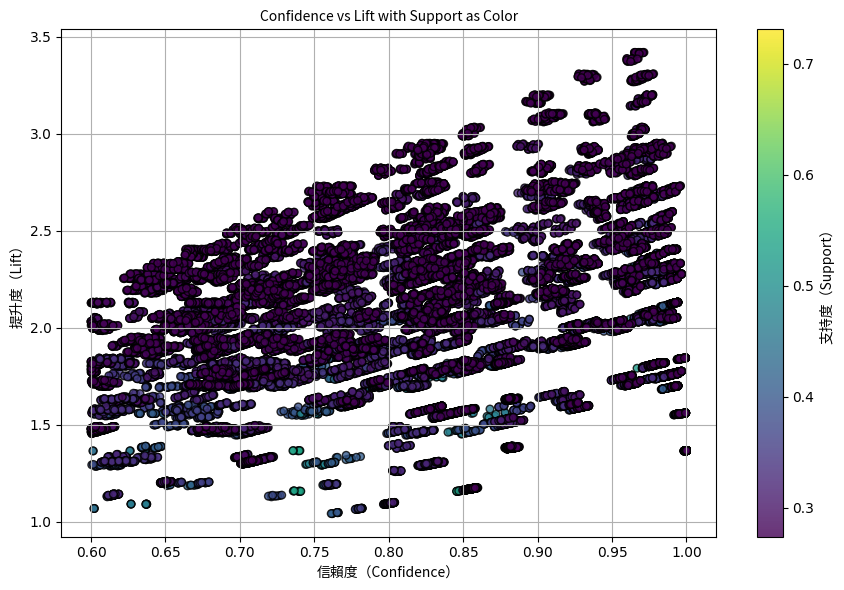

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# ➤ 根據 support 值的範圍建立顏色正規化器
norm = colors.Normalize(vmin=rules_df['support'].min(), vmax=rules_df['support'].max())

# ➤ 使用內建的 viridis 色彩映射（亮綠～深紫）
cmap = cm.viridis

# ➤ 將每筆 support 值轉換為對應的顏色
colors_map = cmap(norm(rules_df['support']))

# ➤ 畫圖開始：使用 matplotlib 的 scatter 畫散佈圖（能配合 colorbar）
plt.figure(figsize=(9, 6))
scatter = plt.scatter(
    rules_df['confidence'],         # x 軸：信賴度
    rules_df['lift'],              # y 軸：提升度
    c=rules_df['support'],         # 點的顏色根據 support 值
    s=30,                         # 每個點大小
    cmap='viridis',                # 顏色使用 viridis colormap
    alpha=0.8,                     # 半透明度
    edgecolors='k'                 # 邊框顏色為黑色
)

# ➤ 加上 colorbar（支援視覺化 support 數值對應顏色）
cbar = plt.colorbar(scatter)
cbar.set_label('支持度（Support）', fontproperties=my_font)  # 若出錯可移除 fontproperties

# ➤ 加上標題與軸標籤
plt.title("Confidence vs Lift with Support as Color", fontproperties=my_font)
plt.xlabel("信賴度（Confidence）", fontproperties=my_font)
plt.ylabel("提升度（Lift）", fontproperties=my_font)

plt.grid(True)
plt.tight_layout()
plt.show()


In [234]:
# 同時站上 3 日均線
above_ma3 = (
    (merged_df['IVV_Close'] > merged_df['IVV_MA3']) &
    (merged_df['SPY_Close'] > merged_df['SPY_MA3'])
).mean()

# 同時站上 7 日均線
above_ma7 = (
    (merged_df['IVV_Close'] > merged_df['IVV_MA7']) &
    (merged_df['SPY_Close'] > merged_df['SPY_MA7'])
).mean()

# 同時站上 30 日均線
above_ma10 = (
    (merged_df['IVV_Close'] > merged_df['IVV_MA30']) &
    (merged_df['SPY_Close'] > merged_df['SPY_MA30'])
).mean()

# 同時站上 252 日均線
above_ma252 = (
    (merged_df['IVV_Close'] > merged_df['IVV_MA252']) &
    (merged_df['SPY_Close'] > merged_df['SPY_MA252'])
).mean()

# 印出結果
print(f"同時站上 3 日均線的比例：{above_ma3:.2%}")
print(f"同時站上 7 日均線的比例：{above_ma7:.2%}")
print(f"同時站上 10 日均線的比例：{above_ma10:.2%}")
print(f"同時站上 252 日均線的比例：{above_ma252:.2%}")


同時站上 3 日均線的比例：54.54%
同時站上 7 日均線的比例：57.03%
同時站上 10 日均線的比例：62.36%
同時站上 252 日均線的比例：69.80%


In [235]:
print(merged_df.columns)

Index(['Date', 'IVV_Close', 'SPY_Close', 'IVV_Up', 'SPY_Up', 'IVV_MA3',
       'IVV_MA7', 'SPY_MA3', 'SPY_MA7', 'IVV_MA3_Up', 'IVV_MA7_Up',
       'SPY_MA3_Up', 'SPY_MA7_Up', 'IVV_MA30', 'IVV_MA252', 'SPY_MA30',
       'SPY_MA252', 'IVV_MA30_Up', 'IVV_MA252_Up', 'SPY_MA30_Up',
       'SPY_MA252_Up'],
      dtype='object')


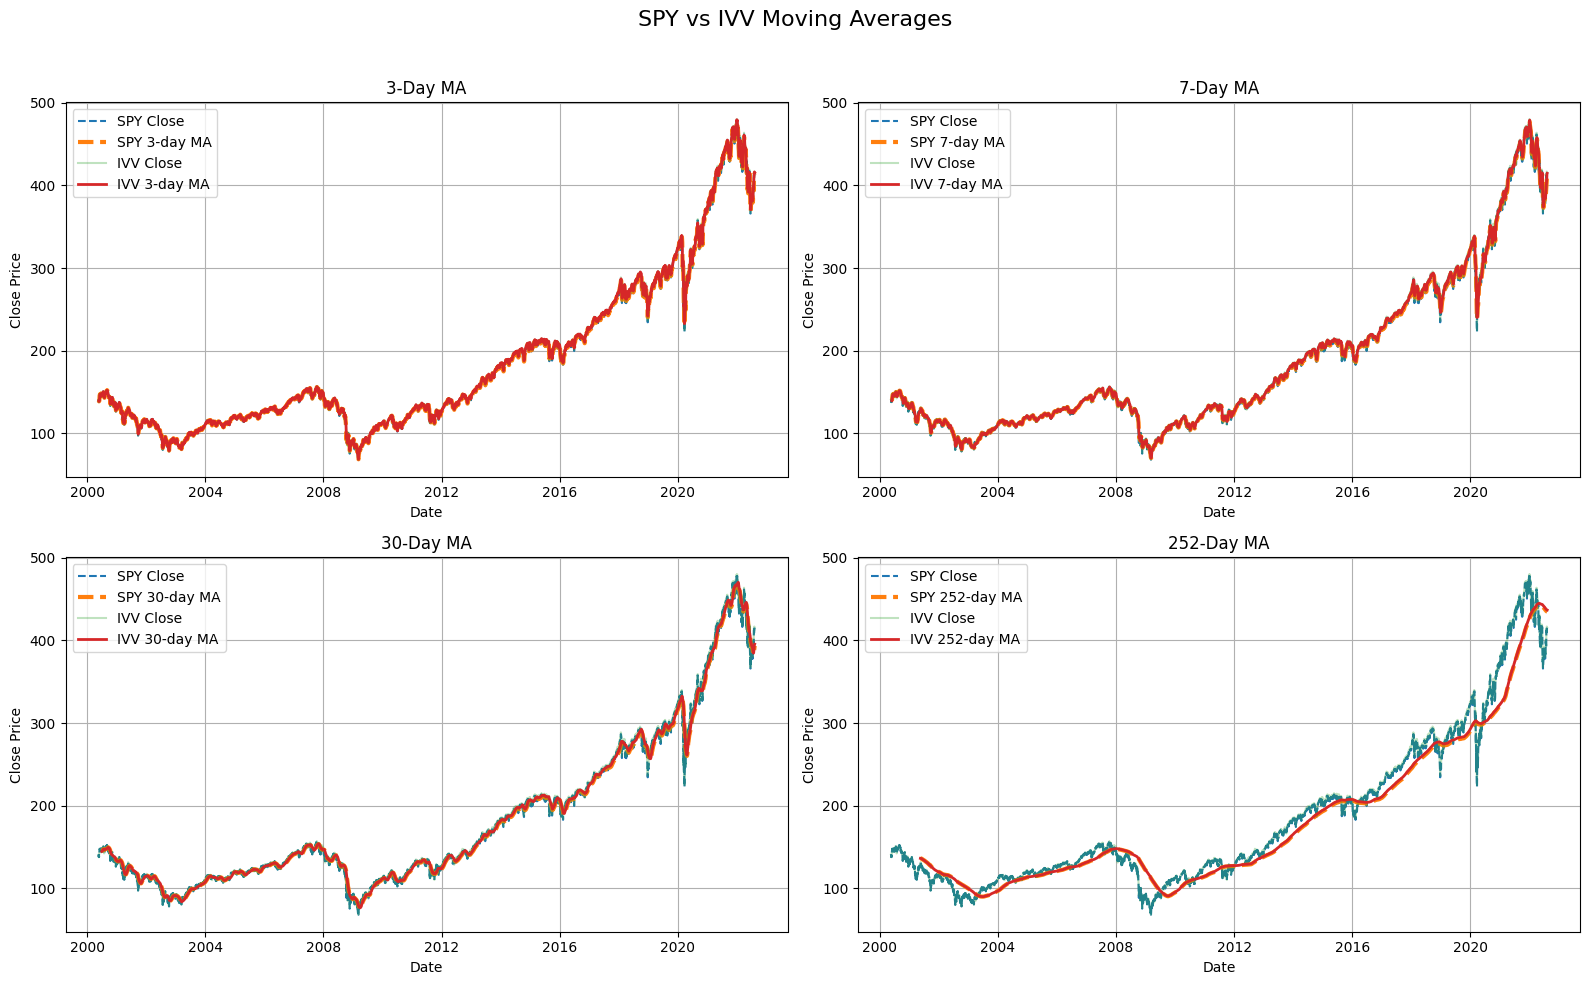

In [236]:
import matplotlib.pyplot as plt

# 設定 subplot
fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2x2 subplot
fig.suptitle('SPY vs IVV Moving Averages', fontsize=16)

# 繪圖函數（用在 subplot 上）
def plot_ma_subplot(ax, window):
    ax.plot(merged_df['Date'], merged_df['SPY_Close'], label='SPY Close', alpha=1 ,ls='--')
    ax.plot(merged_df['Date'], merged_df[f'SPY_MA{window}'], label=f'SPY {window}-day MA', linewidth=3, ls='--')

    ax.plot(merged_df['Date'], merged_df['IVV_Close'], label='IVV Close', alpha=0.3)
    ax.plot(merged_df['Date'], merged_df[f'IVV_MA{window}'], label=f'IVV {window}-day MA', linewidth=2)

    ax.set_title(f'{window}-Day MA')
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    ax.grid(True)
    ax.legend()


# 對應 subplot 位置
windows = [3, 7, 30, 252]
axes = axs.flatten()

for i, window in enumerate(windows):
    plot_ma_subplot(axes[i], window)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # 調整空間避免標題被蓋住
plt.show()


In [237]:
df = merged_df.copy()  # 假設你用的是 merged_df

# 計算每日報酬（百分比變動）
df['IVV_Return'] = df['IVV_Close'].pct_change()
df['SPY_Return'] = df['SPY_Close'].pct_change()


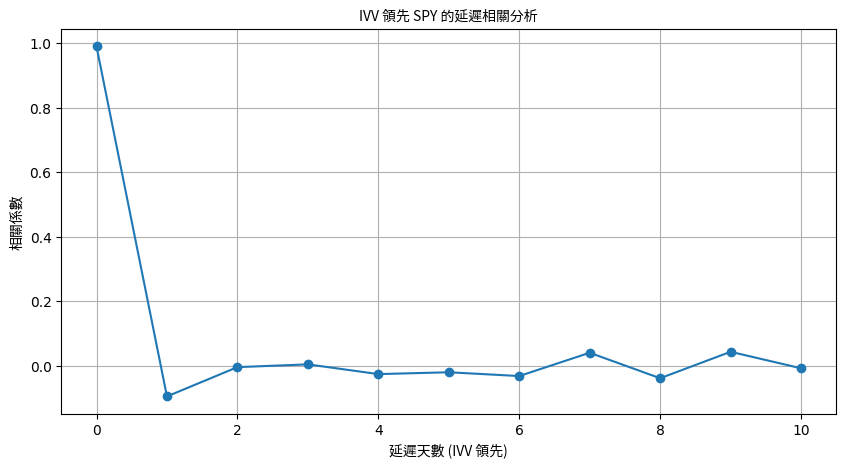

IVV 領先 SPY 的最佳延遲天數是：0 天，相關係數為：0.9904


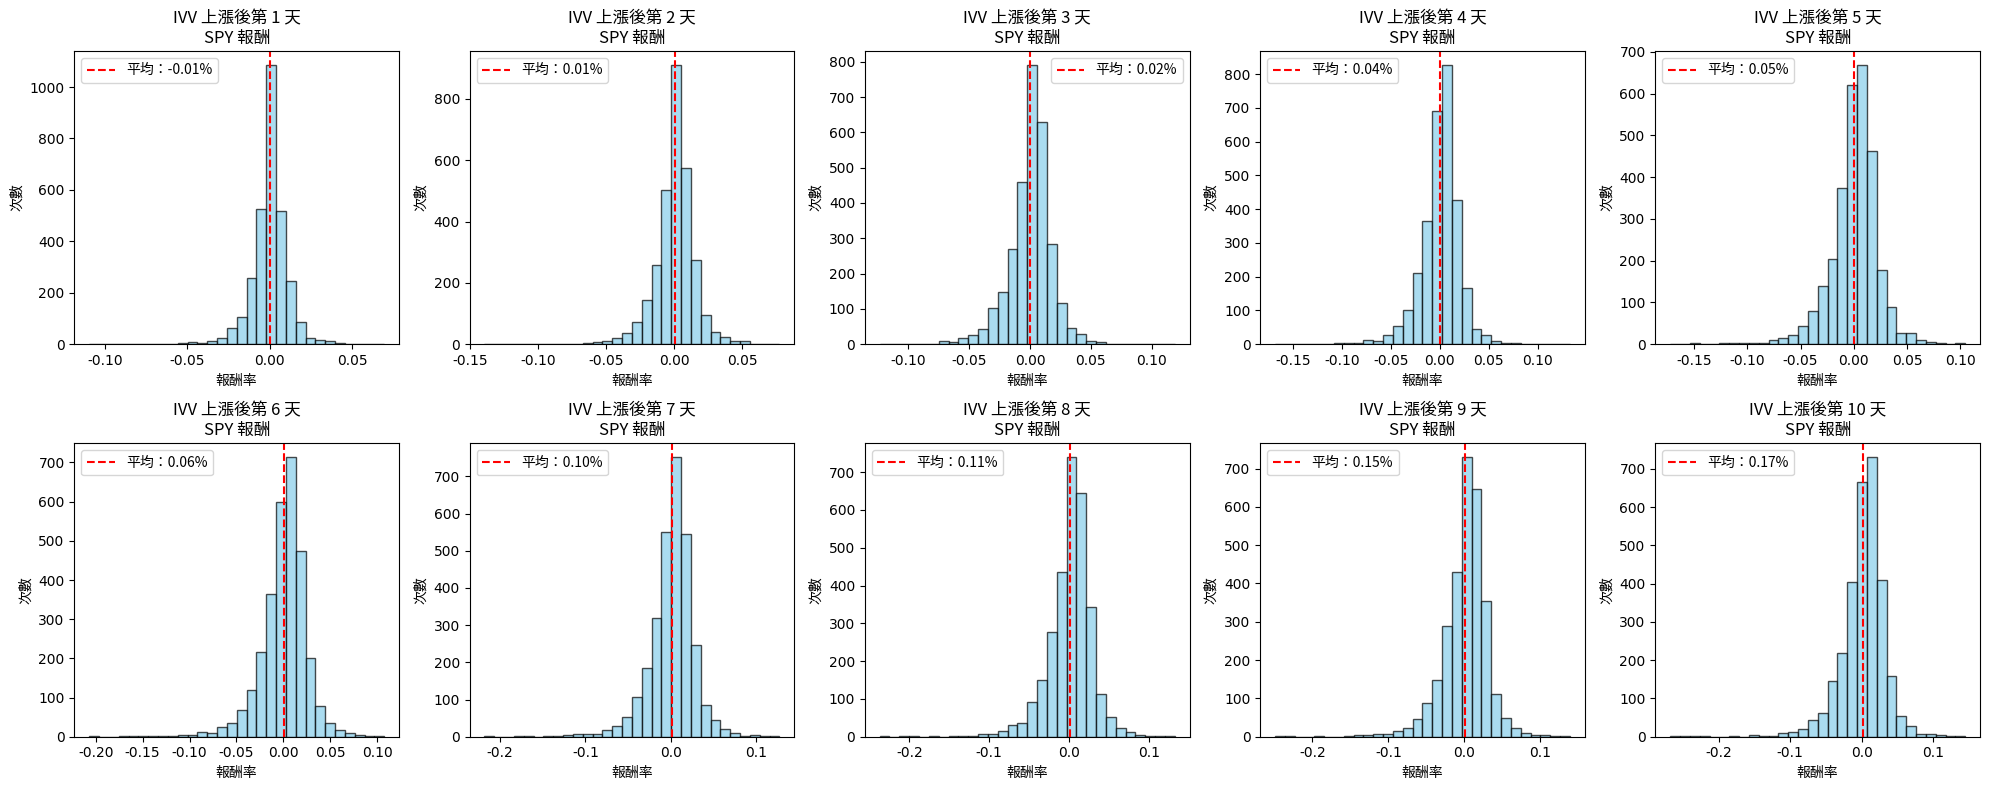